# FitBit Fitness Data Analysis (Capstone Design Project)
# 웰빙 테크 기업 Bellabeat의 데이터 분석 및 비즈니스 전략 수립 프로젝트

_본 과제는 [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) 과정의 최종 프로젝트인 캡스톤 스터디의 일환으로 진행되었습니다._

### 분석 파이프라인
이번 프로젝트는 다음과 같은 분석 프로세스를 거친다.

- **문제 정의**: 명확한 '비즈니스 문제'(business task) 정의
- **데이터 준비**: 데이터 소스 확보, 저장, 정리
- **데이터 처리**: 데이터 정제, 조작 및 문서화
- **데이터 분석**: 비즈니스 문제해결에 유의한 인사이트 도출 (어떤 트렌드? 어떤 관계?)
- **결과 공유**: 결과 요약 및 시각화
- **액션플랜 수립**: 분석 결과를 기반으로 실행가능한 마케팅 전략 제시 

### 분석 기업 소개: 벨라비트 ([Bellabeat](https://bellabeat.com/))
벨라비트(Bellabeat)는 2014년에 설립된 헬스케어 첨단 기술 회사로, 여성 건강에 특화된 스마트 쥬얼리 웨어러블 제품을 주력 상품으로 판매하고 있다. 

당사의 웨어러블 기기들은 여성들의 건강과 직결되는 일상활동, 수면, 스트레스, 생식 건강과 관련된 데이터를 수집, 분석하여 이용자들에게 필요한 정보를 제공한다.

벨라비트 제품은 자체 이커머스 채널뿐만 아니라 다양한 온라인 소매업체들을 통해서도 판매되고 있다. 또한, 라디오, 야외 광고판, 인쇄 및 텔레비전과 같은 전통적인 광고 매체에 투자하면서도 디지털 마케팅에 중점을 두고 있다. 구글 검색에 지속적으로 투자하고 있으며, 페이스북과 인스타그램 페이지를 적극적으로 운영하고, 트위터에서 소비자들과 지속적으로 교류한다. 유튜브에 비디오 광고와 구글 디스플레이 네트워크에 디스플레이 광고 캠페인을 집행하곤 한다. 

## 문제정의
지금보다 한 단계 더 효율적인 마케팅 전략 수립을 위해 당사의 스마트 기기 사용 데이터를 분석하여 유저들의 서비스 이용에 대한 통찰을 얻고자 한다. 이를 위해 타사의 스마트 제품 사용 동향을 먼저 파악하고, 여기서 얻은 통찰을 당사의 제품에 적용하고자 한다.

    - 유저들의 스마트 기기 사용 트렌드가 어떻게 되는가?
    - 이러한 트렌드를 당사 제품에 적용해 유저 경험을 어떻게 개선해볼 수 있을까?








## 데이터 준비/처리
- 공개된 웨어러블 헬스 데이터로 핏빗 피트니스 트래커([FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit))의 데이터를 사용하고자 한다.
- 데이터 소개:
    - 데이터 제공에 동의한 30명의 핏빗 유저들의 1분 당 활동기록, 심박수, 수면 모니터링 기록.
    - 사용자들의 기기 종류에 따라 데이터 값이 상이할 수 있음.
 

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


In [3]:
# # 데이터 저장
# !kaggle datasets download -d arashnic/fitbit

# # 압축 풀기
# !unzip fitbit.zip

fitbit.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fitbit.zip
  inflating: Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv  
  inflat

In [3]:
# 데이터 확인
fitbit_dir = '../Fitabase Data 4.12.16-5.12.16/'
files_in_dir = os.listdir(fitbit_dir)

print('FILES IN DIRECTORY:')
for file in files_in_dir:
    print('\t', fitbit_dir + file)
print('TOTAL: ', len(files_in_dir))


FILES IN DIRECTORY:
	 ../Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv
	 ../Fitabase Data 4.12.16-5.12.16/minuteSteps

- 전체 데이터는 총 18개의 csv 파일로 구성되어 있다. 심박수, 수면, 걸음, 칼로리, 체중 등의 기록들로 예상된다.
- 파일 제목을 훑어보면 'Narrow'와 'Wide' 형태의 파일들이 섞여 있는 것 같다. 또한, 병합된('merged') 데이터로 파악된다.


In [4]:
# 개별 파일 전부 불러오기
dfs = {}

for file in files_in_dir:
    df_name = file.split('.')[0]
    dfs[df_name] = pd.read_csv(fitbit_dir + file)
    print(f'IMPORT COMPLETE: {df_name}')

IMPORT COMPLETE: minuteIntensitiesWide_merged
IMPORT COMPLETE: dailyActivity_merged
IMPORT COMPLETE: sleepDay_merged
IMPORT COMPLETE: heartrate_seconds_merged
IMPORT COMPLETE: minuteIntensitiesNarrow_merged
IMPORT COMPLETE: minuteMETsNarrow_merged
IMPORT COMPLETE: hourlySteps_merged
IMPORT COMPLETE: hourlyIntensities_merged
IMPORT COMPLETE: dailyCalories_merged
IMPORT COMPLETE: hourlyCalories_merged
IMPORT COMPLETE: minuteSleep_merged
IMPORT COMPLETE: minuteCaloriesNarrow_merged
IMPORT COMPLETE: dailySteps_merged
IMPORT COMPLETE: minuteCaloriesWide_merged
IMPORT COMPLETE: minuteStepsNarrow_merged
IMPORT COMPLETE: minuteStepsWide_merged
IMPORT COMPLETE: weightLogInfo_merged
IMPORT COMPLETE: dailyIntensities_merged


데이터가 엄청 많다... 제목을 봤을 때 minute (분 단위), hourly (시간 단위)가 들어간 데이터보다는 daily (일간) 데이터가 유저들의 기기 활용 트렌드를 보기에 용이할 것 같다. 또한, 중복데이터도 존재하는 것으로 보인다(dailyCalories_merged, dailySteps_merged). 따라서 아래의 몇 개의 데이터에만 선택과 집중을 하도록 하자.
- dailyActivity_merged
- sleepDay_merged
- weightLogInfo_merged (체중 데이터는 최소 하루 이상에 걸쳐 측정을 했을테니 포함)
- dailyIntensities_merged

## 탐색적 데이터 분석

### 1. 활동량 (Activity)
- 33명의 참가자들의 1달 간의 보행, 활동량, 칼로리 소모 데이터.


In [7]:
activity = dfs['dailyActivity_merged']
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format='%m/%d/%Y')   # 날짜변수로 변환

activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [22]:
activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [19]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [14]:
# 고유 참가자 ID
activity.Id.nunique()

33

In [13]:
# 2016-04-12 ~ 2016-05-11 한달간 측정치
activity.ActivityDate.min(), activity.ActivityDate.max() 

(Timestamp('2016-04-12 00:00:00'), Timestamp('2016-05-12 00:00:00'))

In [18]:
# 중복 측정치 없음 (하루 1개 행 생성)
activity.groupby(['Id', 'ActivityDate'])['TotalSteps'].count().max()

1

In [39]:
# 참가자별 1달 간 평균 활동량
subejct_activity = activity.groupby(['Id']).mean()
subejct_activity.drop(columns=['ActivityDate'], inplace=True)   # 평균했으니 날짜 필요 X

subejct_activity.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,
1503960366,12116.741935,7.809677,7.809677,0.0,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355
1624580081,5743.903226,3.914839,3.914839,0.0,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839
1644430081,7282.966667,5.295333,5.295333,0.0,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000
1844505072,2580.064516,1.706129,1.706129,0.0,0.008387,0.049032,1.647419,0.000000,0.129032,1.290323,115.451613,1206.612903,1573.483871
1927972279,916.129032,0.634516,0.634516,0.0,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,38.580645,1317.419355,2172.806452


In [34]:
# 확인할 지표
metrics = [
    'TotalSteps', 'TotalDistance', 'TrackerDistance',
    'LoggedActivitiesDistance', 'VeryActiveDistance',
    'ModeratelyActiveDistance', 'LightActiveDistance',
    'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
    'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'
]

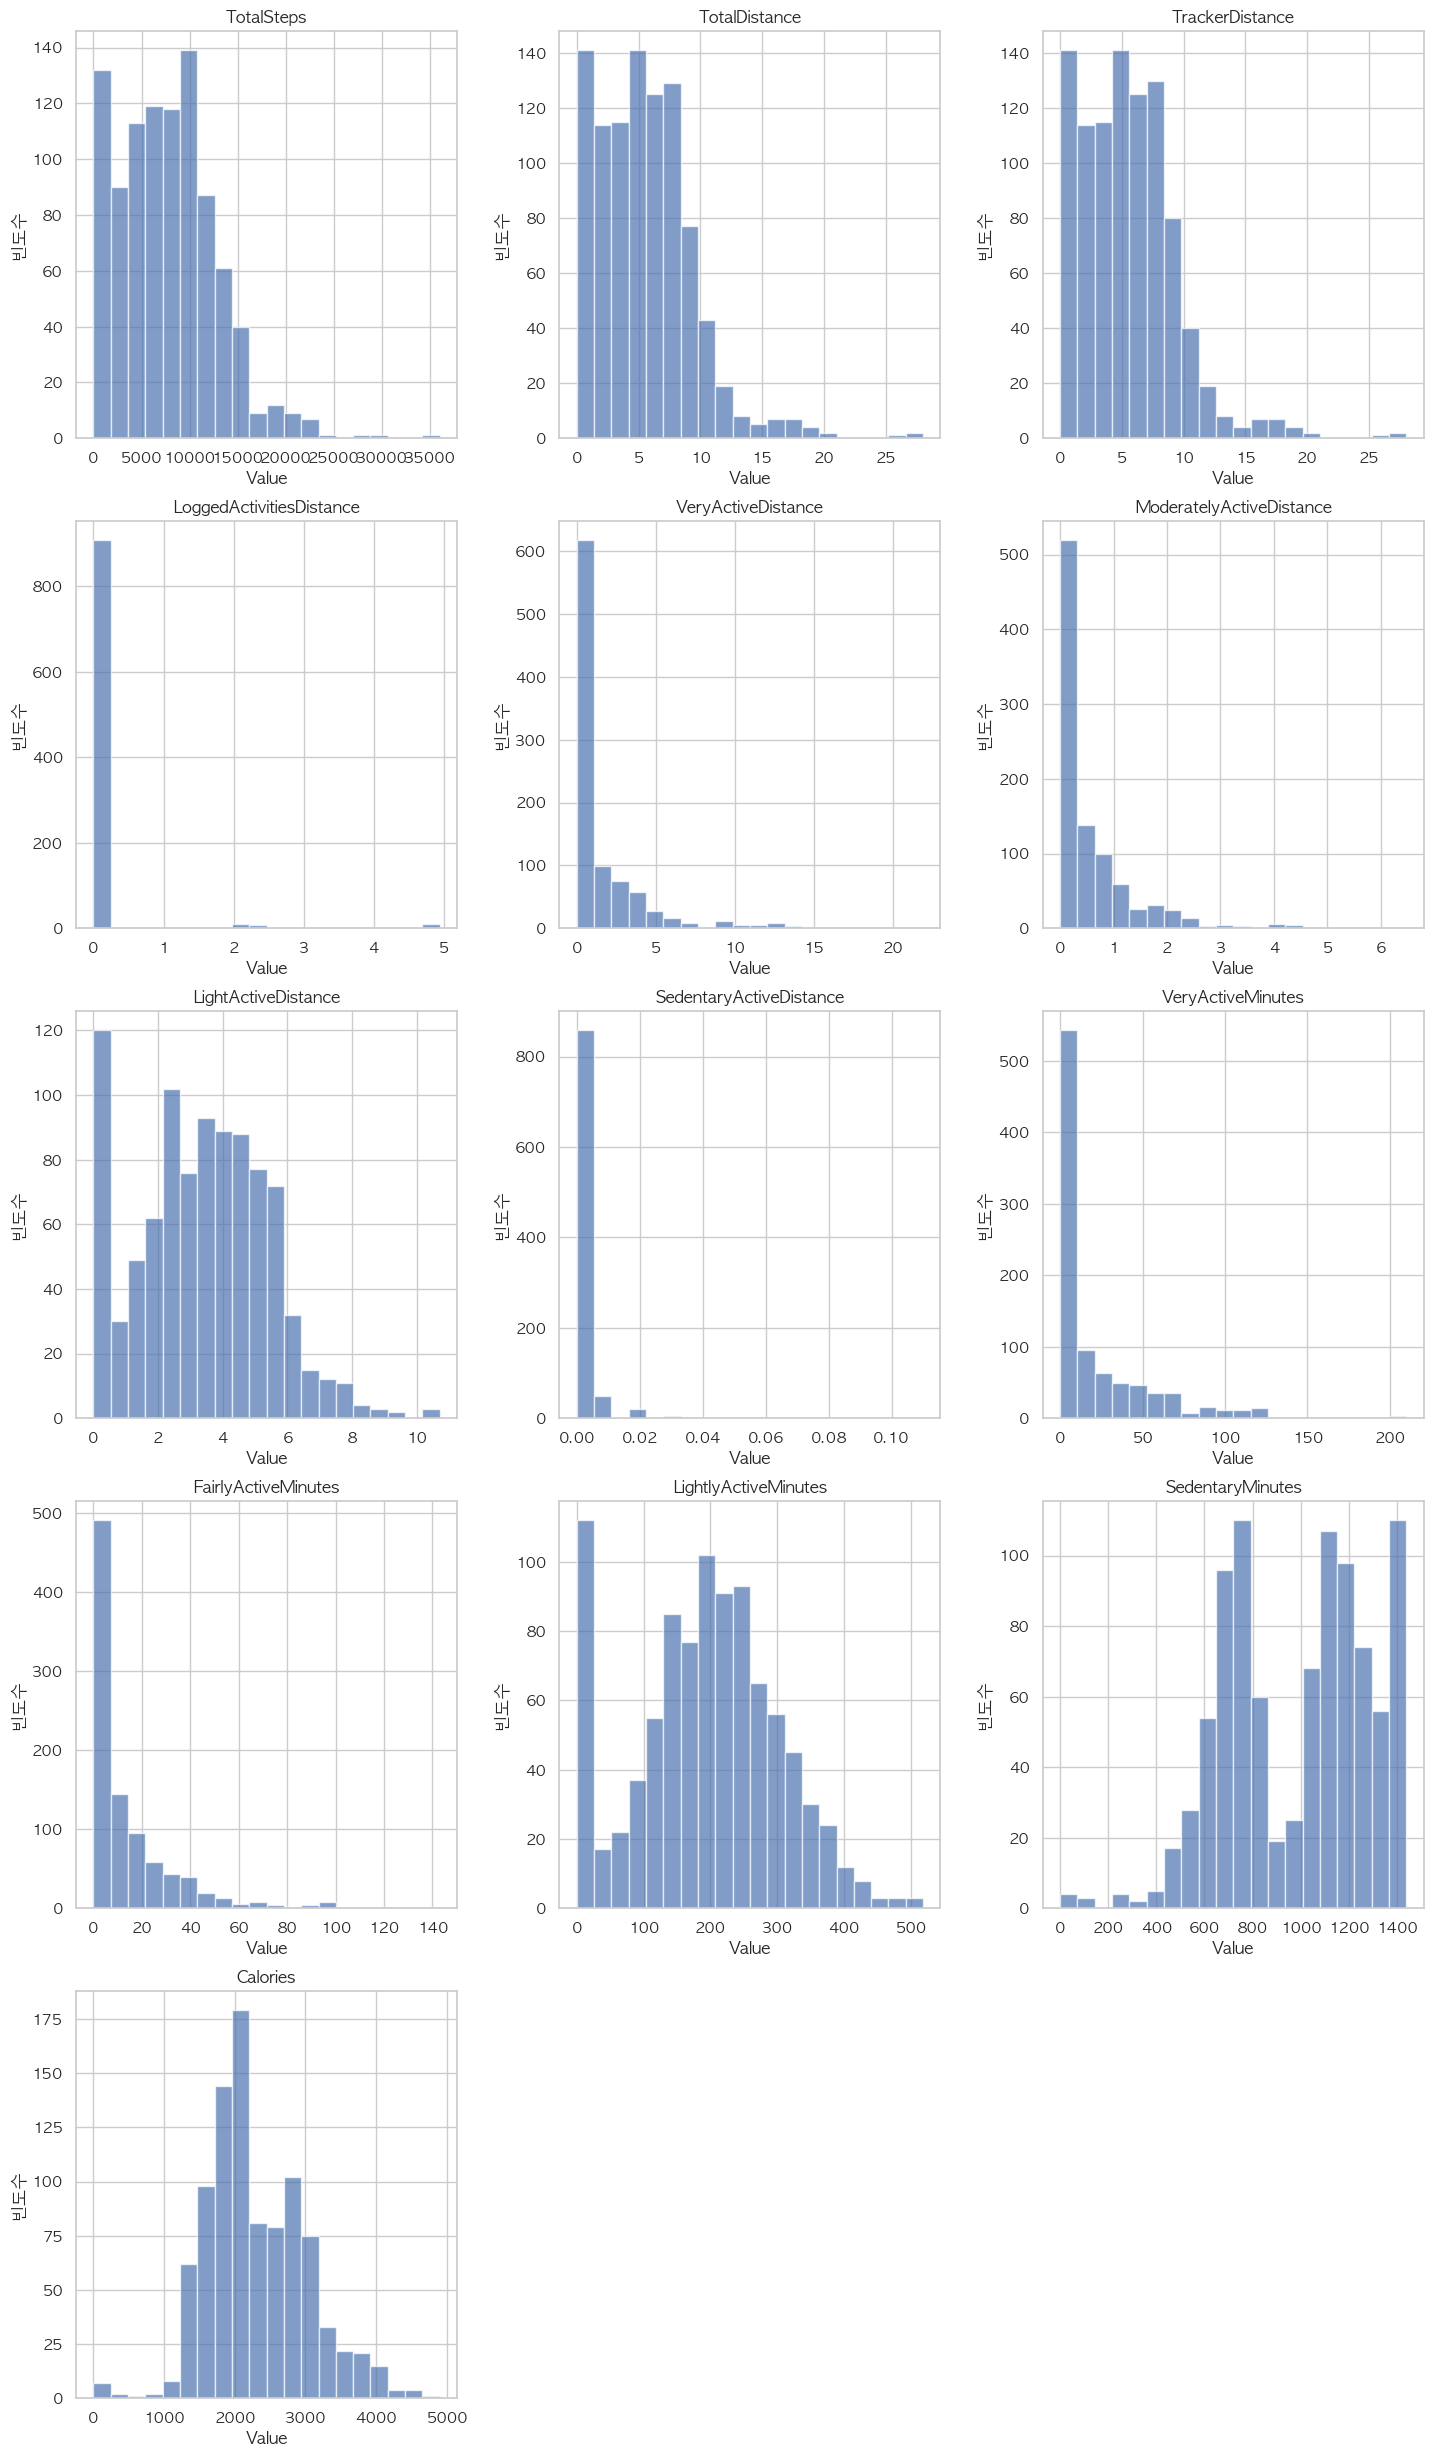

In [36]:
# 지표별 전체 분포 확인

n_rows = len(metrics) // 3 + (1 if len(metrics) % 3 else 0)
fig, axs = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
fig.tight_layout(pad=3.0)

for i, metric in enumerate(metrics):

    row = i // 3
    col = i % 3
    
    if n_rows > 1:
        ax = axs[row, col]
    else:
        ax = axs[col]
    
    ax.hist(activity[metric], bins=20, alpha=0.7, label=metric)
    ax.set_title(metric)
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Value')

for j in range(i + 1, n_rows * 3):
    fig.delaxes(axs.flatten()[j])

plt.show()

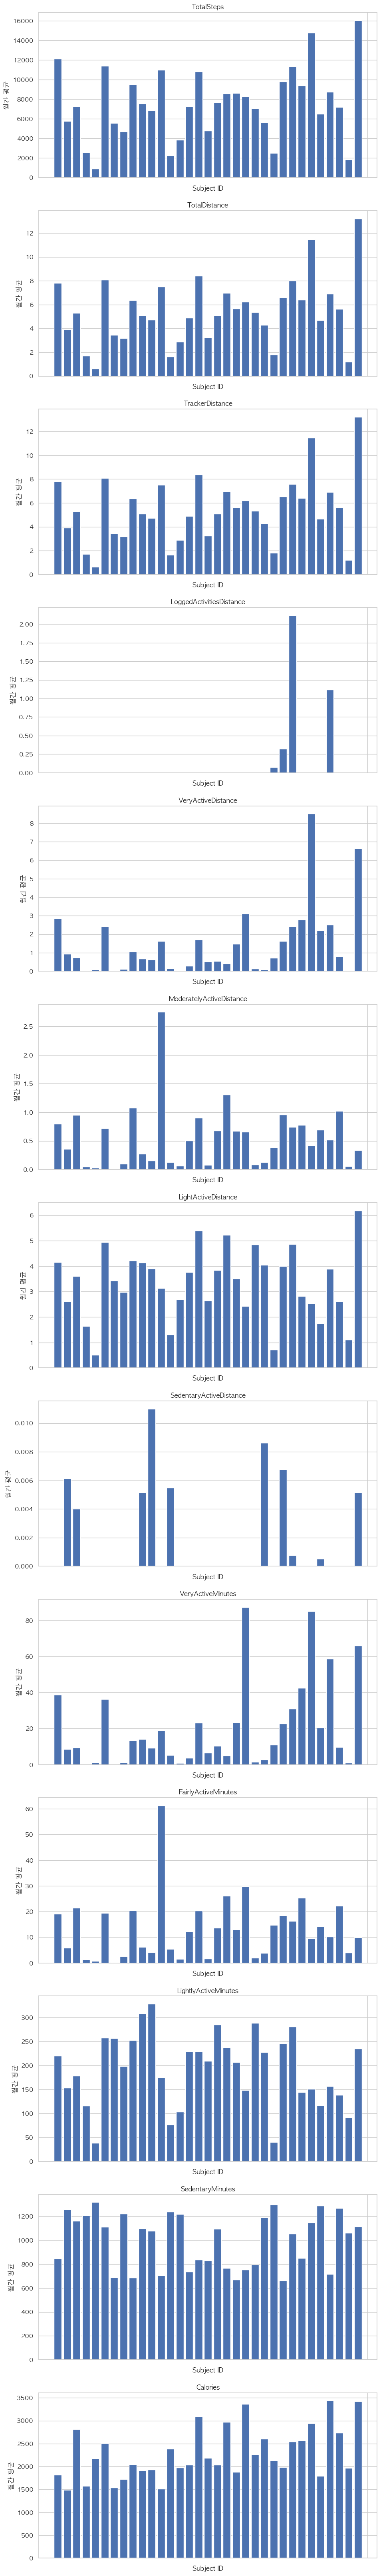

In [33]:
# 유저별 월평균 활동량

num_metrics = len(metrics)
fig, axs = plt.subplots(num_metrics, 1, figsize=(10, 5*num_metrics))
fig.tight_layout(pad=3.0)

for i, metric in enumerate(metrics):
    values = subejct_activity[metric]

    axs[i].bar(subejct_activity.index.astype(str), values)
    axs[i].set_title(metric)
    axs[i].set_ylabel('월간 평균')
    axs[i].set_xlabel('Subject ID')
    axs[i].set_xticks('')

plt.show()

1. 개인 생활 습관에 따라 활동량 편차가 크다. --> 개인화된 접근이 필요할 것.
2. 위 그래프들을 보면, 행동강도에 따라 몇 개의 유형으로 나눠볼 수 있을 것 같다.
- SedentaryActive, LightActive, FairlyActive, VeryActive 등등.. 

In [57]:
activity_groups = ['VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes']

In [58]:
for group in activity_groups:
    mean = subejct_activity[group].mean()
    median = subejct_activity[group].median()
    std = subejct_activity[group].std()
    min = subejct_activity[group].min()
    max = subejct_activity[group].max()

    print(f'{group}')
    print(f'mean: {mean}')
    print(f'median: {median}')
    print(f'std: {std}')
    print(f'min: {min}')
    print(f'max: {max}')
    print('')

VeryActiveMinutes
mean: 20.30876897237766
median: 10.387096774193548
std: 23.803213701779477
min: 0.0967741935483871
max: 87.33333333333333

FairlyActiveMinutes
mean: 13.260239778327128
median: 12.32258064516129
std: 12.108216857875854
min: 0.25806451612903225
max: 61.266666666666666

LightlyActiveMinutes
mean: 191.52129107809102
median: 206.19354838709677
std: 75.68974657627162
min: 38.58064516129032
max: 327.9

SedentaryMinutes
mean: 999.1514749091822
median: 1077.55
std: 227.67852590966388
min: 662.3225806451613
max: 1317.4193548387098



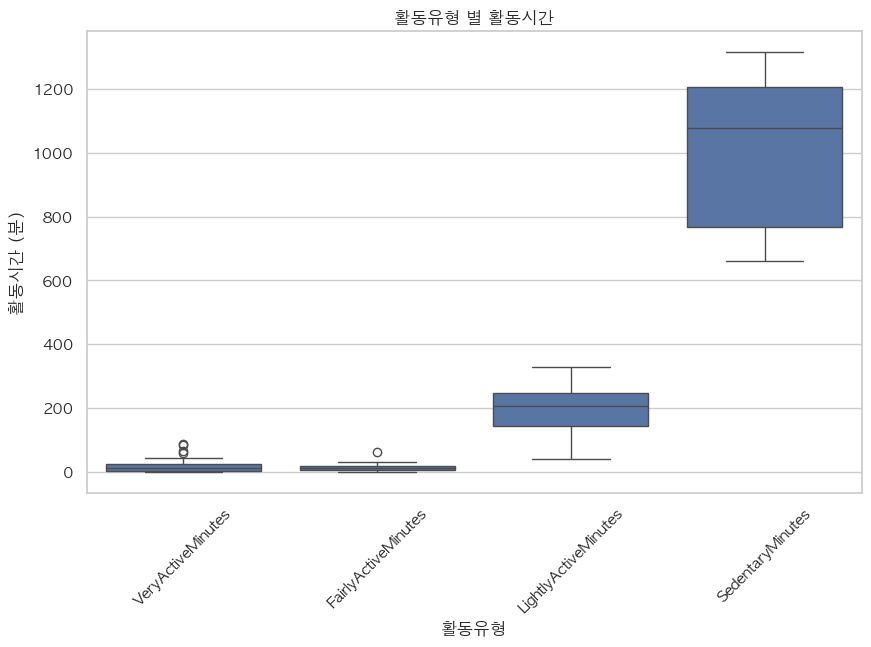

In [62]:
# 집단별 박스플롯 확인

# 먼저 데이터를 long format으로 변환
melted_data = pd.melt(subejct_activity.reset_index(), id_vars=['Id'], value_vars=activity_groups, var_name='활동유형', value_name='활동시간 (분)')

plt.figure(figsize=(10, 6))
sns.boxplot(x='활동유형', y='활동시간 (분)', data=melted_data)

plt.title('활동유형 별 활동시간')
plt.xticks(rotation=45) 

plt.show()

1. VeryActive: 고활동
2. FairlyActive: 중간활동
3. LightlyActive: 저활동
4. Sedentary: 무활동

상기 네 가지의 활동 유형 별로 활동시간의 차이를 보면, 무활동(Sedentary) 시간이 가장 높은 것으로 나타난다.

당연한 수치겠지만 (앉아 있는 시간이 더 많을 것으로 가정), 활동량, 또는 활동 강도의 차이에 따라 다른 지표들(예: 수면, 칼로리 소모 등)의 차이가 있는지 확인해볼 필요가 있겠다.

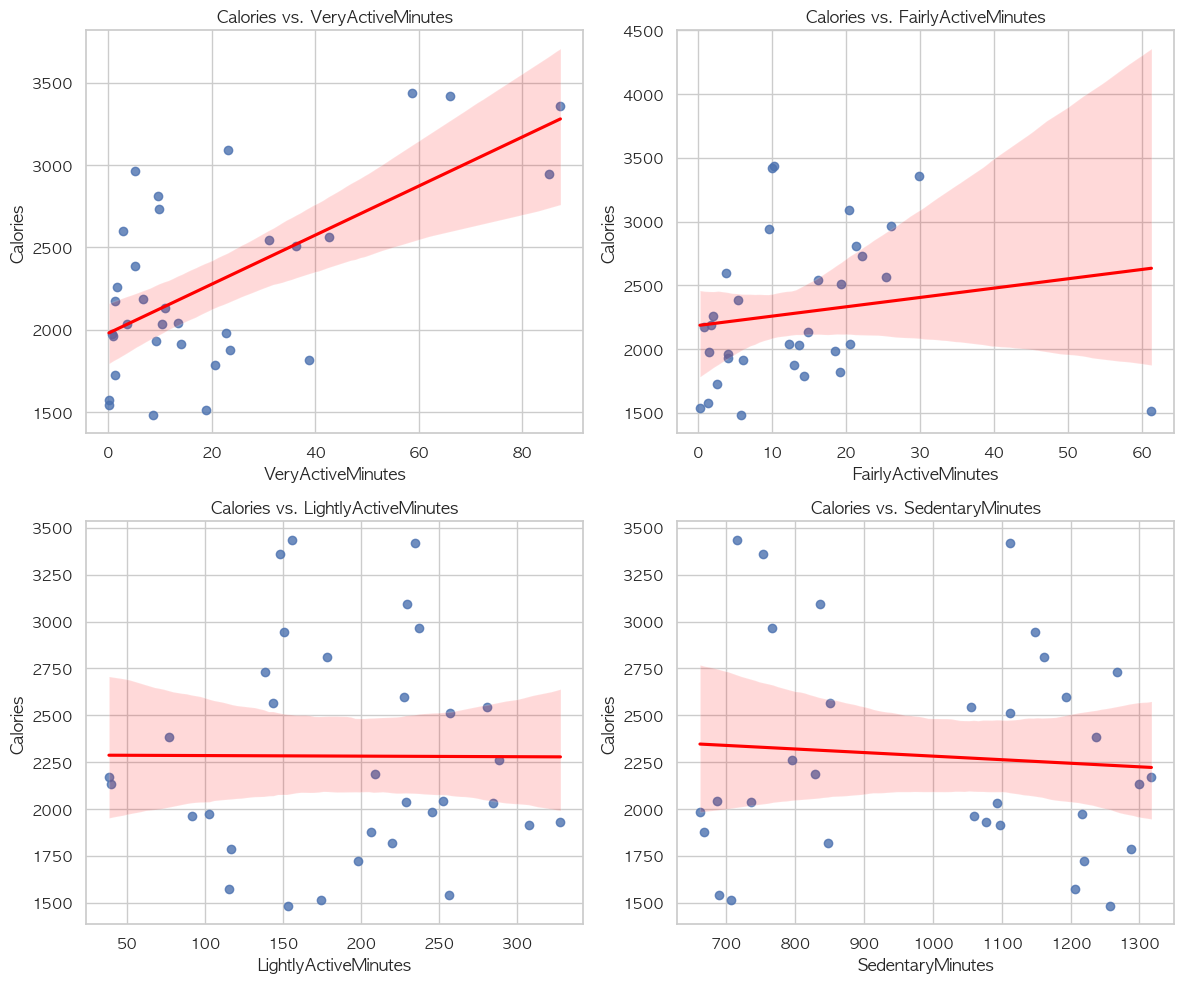

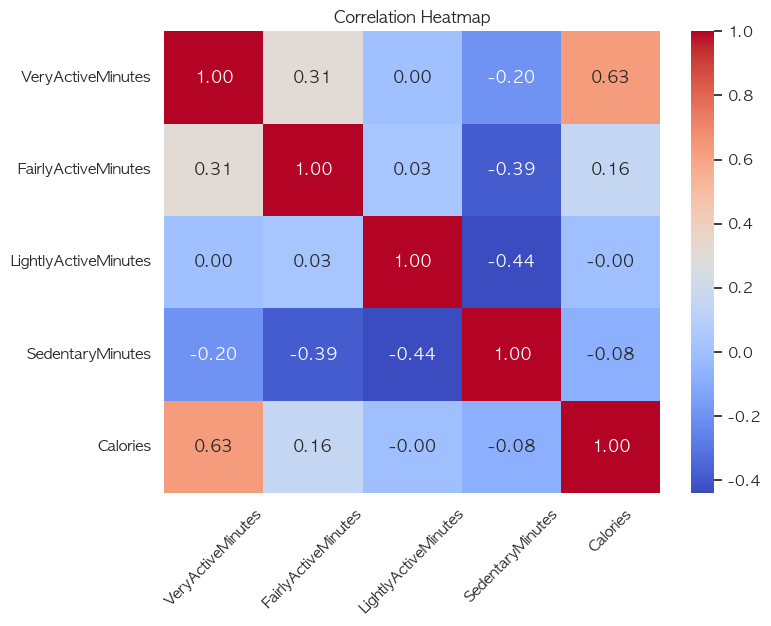

In [77]:
# 활동강도 별로 활동 시간과 칼로리 소모의 상관관계 확인

activity_groups = ['VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

# 상관행렬
corr_matrix = subejct_activity[activity_groups].corr()

# Scatterplot: 활동강도 별로 활동 시간과 칼로리 소모의 상관관계 확인
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, activity_group in enumerate(activity_groups[:-1]):
    # sns.scatterplot(data=subejct_activity, x=activity_group, y='Calories', ax=axs[i])
    sns.regplot(data=subejct_activity, x=activity_group, y='Calories', ax=axs[i], line_kws={"color": "red"})
    axs[i].set_title(f'Calories vs. {activity_group}')
    axs[i].set_xlabel(activity_group)
    axs[i].set_ylabel('Calories')

plt.tight_layout()
plt.show()

# 상관행렬 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45) 
plt.show()

네 개의 활동 유형 중에서, 실질적으로 칼로리 소모로 이어지는 활동 유형은 고활동 (VeryActive) 시간인 것으로 확인된다 (상관관계 0.63).

따라서, 건강 습관 개선을 원하는 유저들의 고활동 운동 시간을 늘리도록 유도하는 것이 중요할 것. 

한계: 고활동 유저 중에는 활동 시간이 1시간이 넘어가는, outlier로 의심되는 케이스들이 존재한다. 데이터가 많지 않다는 점을 감안하면, 이들을 제거했을 때 상관관계가 변하는지 확인이 필요하다.


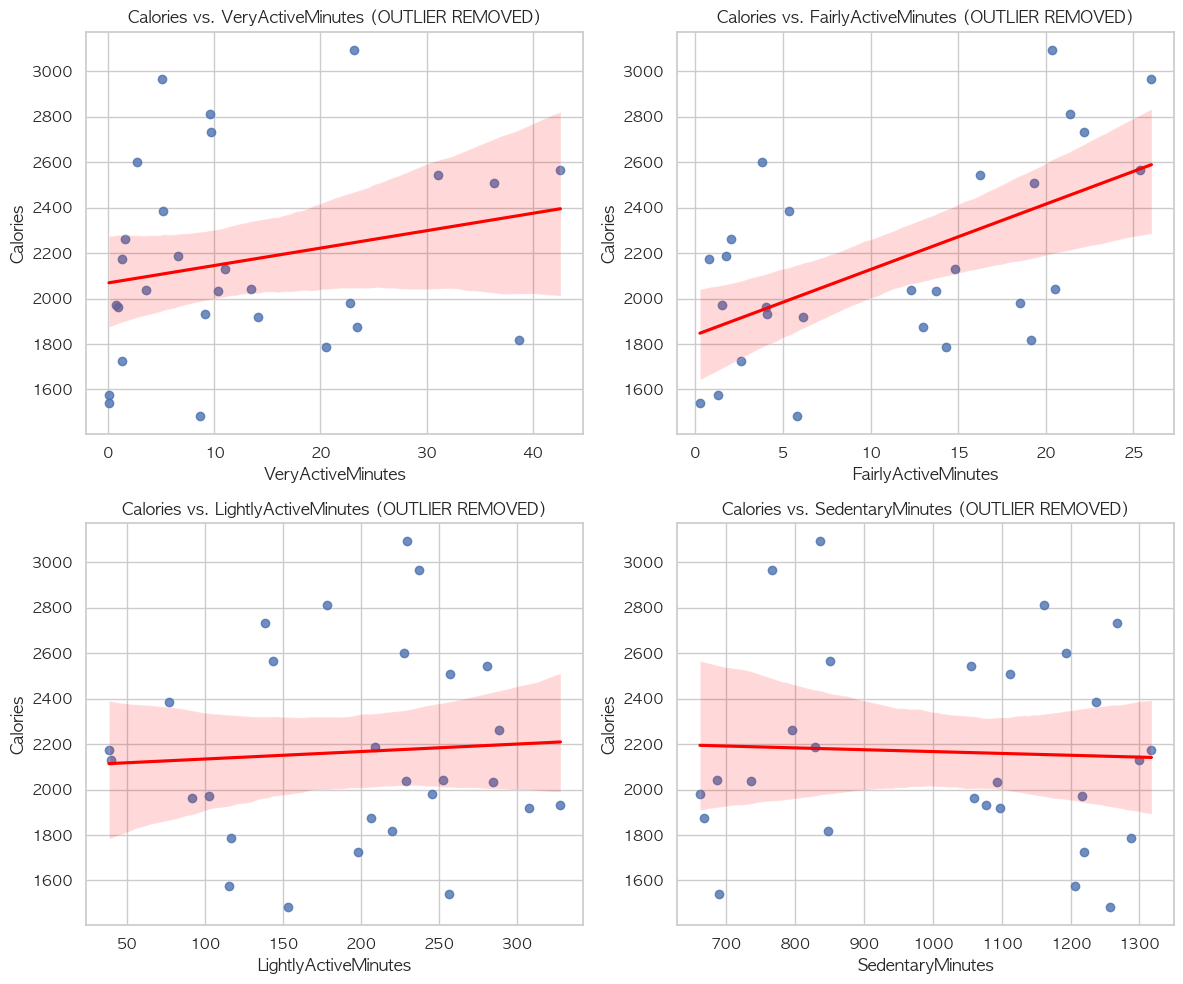

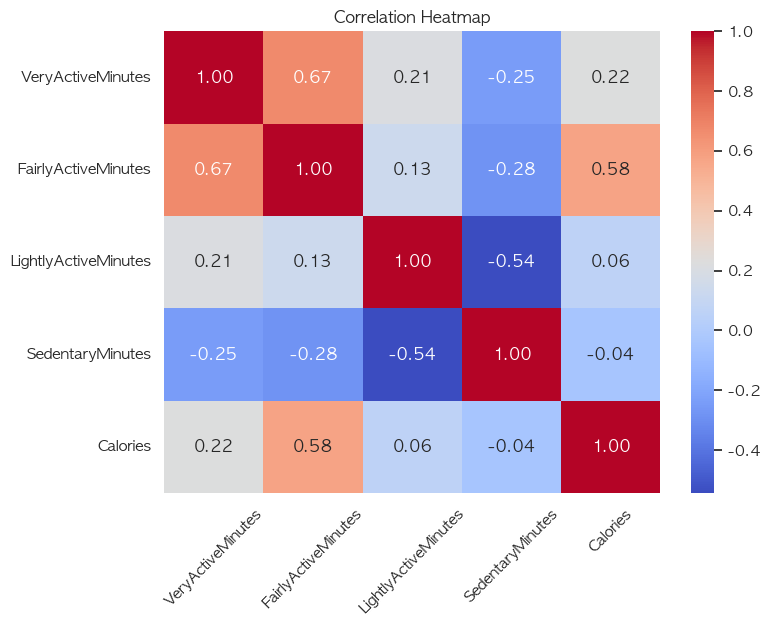

In [78]:
# outlier 제거 후 상관관계 확인

subejct_activity_filtered = subejct_activity[(subejct_activity.VeryActiveMinutes < 50) & (subejct_activity.FairlyActiveMinutes < 50)]

# 상관행렬
corr_matrix = subejct_activity_filtered[activity_groups].corr()

# Scatterplot: 활동강도 별로 활동 시간과 칼로리 소모의 상관관계 확인
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, activity_group in enumerate(activity_groups[:-1]):
    # sns.scatterplot(data=subejct_activity, x=activity_group, y='Calories', ax=axs[i])
    sns.regplot(data=subejct_activity_filtered, x=activity_group, y='Calories', ax=axs[i], line_kws={"color": "red"})
    axs[i].set_title(f'Calories vs. {activity_group} (OUTLIER REMOVED)')
    axs[i].set_xlabel(activity_group)
    axs[i].set_ylabel('Calories')

plt.tight_layout()
plt.show()

# 상관행렬 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45) 
plt.show()

실제로 활동 시간이 극단값에 있는 케이스를 (50분 이상) 제거하면, 활동시간과 칼로리 소모의 상관관계가 급격하게 감소 (0.63 -> 0.22)하는 것을 확인했다.

그럼에도 불구하고, 고활동 시간과 중간활동 시간이 높을수록 칼로리 소모가 높다는 것을 확인할 수 있다.
- **칼로리 소모 ~ 고활동: 0.22**
- **칼로리 소모 ~ 중간활동: 0.58**
- 칼로리 소모 ~ 저활동: 0.06
- 칼로리 소모 ~ 무활동: -0.04

아주 미세한 수준이긴 하지만, 무활동 시간이 많을수록 칼로리 소모량이 떨어진다. 

아래 그래프를 보면 알 수 있겠지만, 활동으로 인한 칼로리 소모는 걸음수와 눈에 띄는 상관 트렌드를 보인다.
- 평균 걸음수는 약 7600보 (중간값: 7405, 표준편차 5000), 평균 칼로리 소모는 약 2300칼로리 (표준편차 718)로 확인된다. 
    - 데이터의 편차가 좀 큰 편.
- 미국 성인의 하루 평균 걸음걸이가 4000보 정도로 알려진 점을 고려할 때([한국일보 자료](https://m.hankookilbo.com/News/Read/A2021100122140004827)), 실험의 참가자들은 액티브 유저들인 것으로 판단된다. 
- 즉, 표본이 무선표집되지 않았을 가능성이 있어 주의가 필요하겠다. 

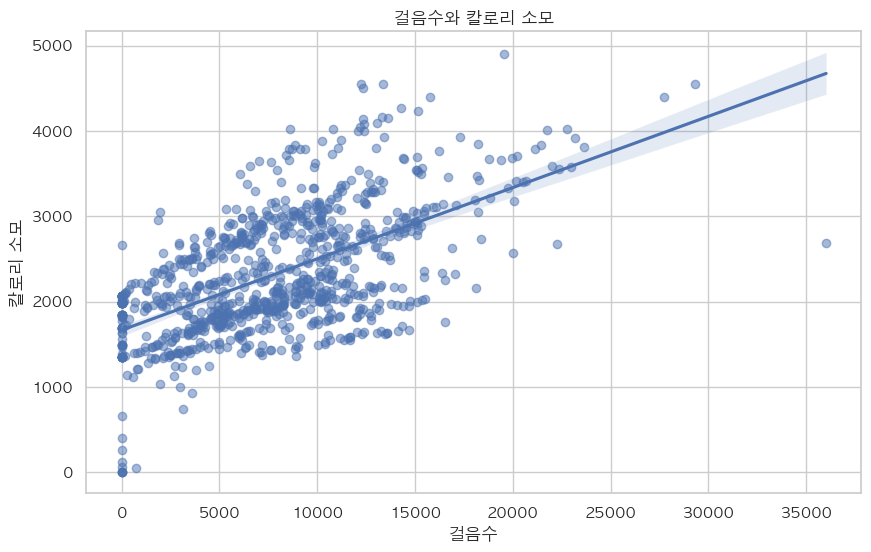

In [105]:
plt.figure(figsize=(10,6))
sns.regplot(x='TotalSteps', y='Calories', data=activity, scatter_kws={'alpha':0.5})
plt.title('걸음수와 칼로리 소모')
plt.xlabel('걸음수')
plt.ylabel('칼로리 소모')
plt.show()


간단히 정리하면, 활동 시간이 많을수록 (걸음수, 강도의 영향일 것으로 판단) 칼로리 소모량이 많다.

다음으로, 무활동이 다른 지표에 어떤 영향을 주는지도 살펴보겠다.

### 2. 수면 (Sleep)

In [94]:
sleep = dfs['sleepDay_merged']
print(sleep.shape)
sleep.head()

(413, 5)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [101]:
# 참가자별로 aggregate (한달 간 총 수면시간) 후 테이블 결합
activity_group = activity.drop(columns='ActivityDate')
activity_group = activity_group.groupby(['Id']).sum()   # 한달간 총 활동량

sleep_group = sleep.groupby(['Id'])[['TotalMinutesAsleep', 'TotalTimeInBed']].sum()   # 한달간 총 수면시간

subject_group_sum = pd.merge(activity_group, sleep_group, on='Id', how='left')
subject_group_sum

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
Id,,,,,,,,,,,,,,,
1503960366,375619,242.099999,242.099999,0.000000,88.610000,24.620000,128.740000,0.00,1200,594,6818,26293,56309,9007.0,9580.0
1624580081,178061,121.360001,121.360001,0.000000,29.120000,11.180000,80.810000,0.19,269,180,4758,38990,45984,NaN,NaN
1644430081,218489,158.860001,158.860001,0.000000,21.900000,28.530000,108.270001,0.12,287,641,5354,34856,84339,1176.0,1384.0
1844505072,79982,52.890000,52.890000,0.000000,0.260000,1.520000,51.069999,0.00,4,40,3579,37405,48778,1956.0,2883.0
1927972279,28400,19.670000,19.670000,0.000000,2.970000,0.970000,15.720000,0.00,41,24,1196,40840,67357,2085.0,2189.0
2022484408,352490,250.609998,250.609998,0.000000,75.069999,22.320000,153.220000,0.00,1125,600,7981,34490,77809,NaN,NaN
2026352035,172573,107.100000,107.100000,0.000000,0.190000,0.350000,106.520000,0.00,3,8,7956,21372,47760,14173.0,15054.0
2320127002,146223,98.819999,98.819999,0.000000,3.310000,3.030000,92.390000,0.00,42,80,6144,37823,53449,61.0,69.0
2347167796,171354,114.400000,114.400000,0.000000,19.070000,19.350000,75.990001,0.00,243,370,4545,12369,36782,6702.0,7370.0


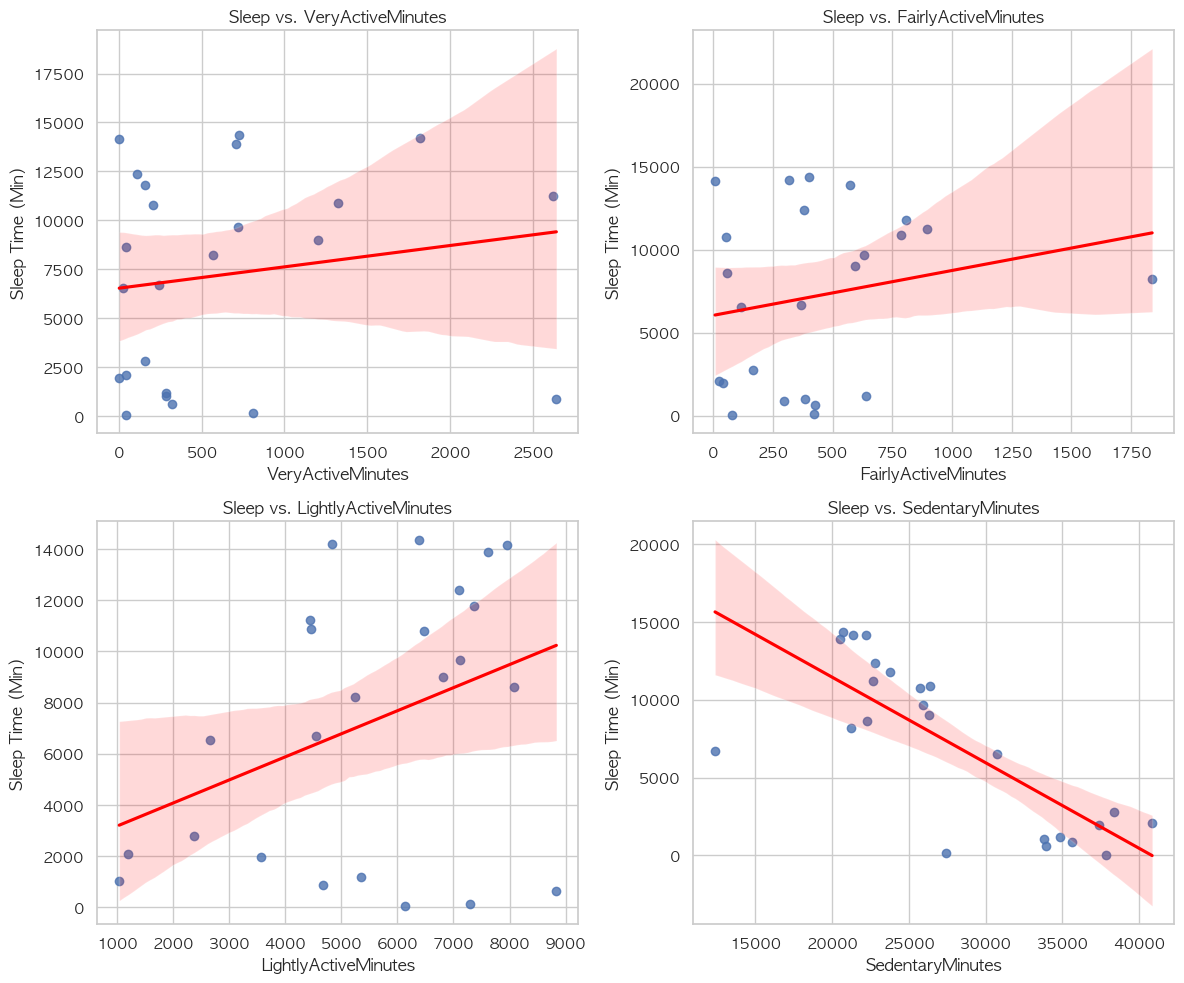

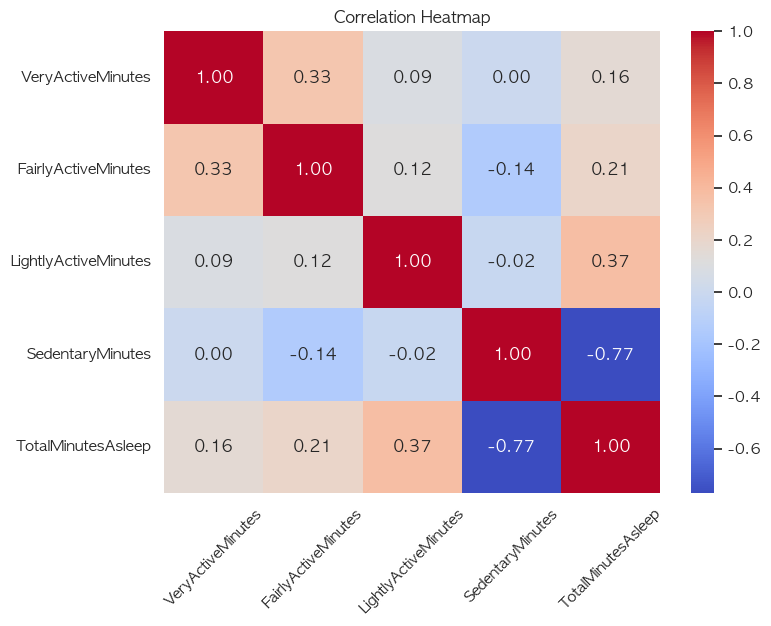

In [103]:
# 활동강도 별로 활동 시간과 수면시간의 상관관계 확인

activity_groups = ['VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalMinutesAsleep']

# 상관행렬
corr_matrix = subject_group_sum[activity_groups].corr()

# Scatterplot: 활동강도 별로 활동 시간과 수면시간의 상관관계 확인
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, activity_group in enumerate(activity_groups[:-1]):
    sns.regplot(data=subject_group_sum, x=activity_group, y='TotalMinutesAsleep', ax=axs[i], line_kws={"color": "red"})
    axs[i].set_title(f'Sleep vs. {activity_group}')
    axs[i].set_xlabel(activity_group)
    axs[i].set_ylabel('Sleep Time (Min)')

plt.tight_layout()
plt.show()

# 상관행렬 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45) 
plt.show()

흥미로운 결과. '무활동' 시간이 길어질수록 수면시간이 줄어드는 것을 확인했다.
- 수면시간 ~ 고활동: 0.16
- 수면시간 ~ 중간활동: 0.21
- 수면시간 ~ 저활동: 0.37
- **수면시간 ~ 무활동: -0.77**

### 3. 체중 변화
- datetime 별로 유저가 입력한 몸무게 값의 데이터다. 
- 데이터를 들어다 보기 전에 몇 가지 전처리 작업이 필요하다.
    - 'Date' 칼럼의 타입을 datetime으로 변환
    - 사용할 칼럼: 'Date'(시계열), 'WeightKg', 'BMI'

In [107]:
weight = dfs['weightLogInfo_merged']
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [108]:
# datetime 변환
weight['Date'] = pd.to_datetime(weight['Date'], format='%m/%d/%Y %I:%M:%S %p')

# 칼럼제거
weight = weight[['Id', 'Date', 'WeightKg', 'BMI']]
weight.head()

,Id,Date,WeightKg,BMI
0,1503960366,2016-05-02 23:59:59,52.599998,22.650000
1,1503960366,2016-05-03 23:59:59,52.599998,22.650000
2,1927972279,2016-04-13 01:08:52,133.500000,47.540001
3,2873212765,2016-04-21 23:59:59,56.700001,21.450001
4,2873212765,2016-05-12 23:59:59,57.299999,21.690001


In [111]:
# 체중 데이터가 있는 유저 수
weight.Id.nunique()

8

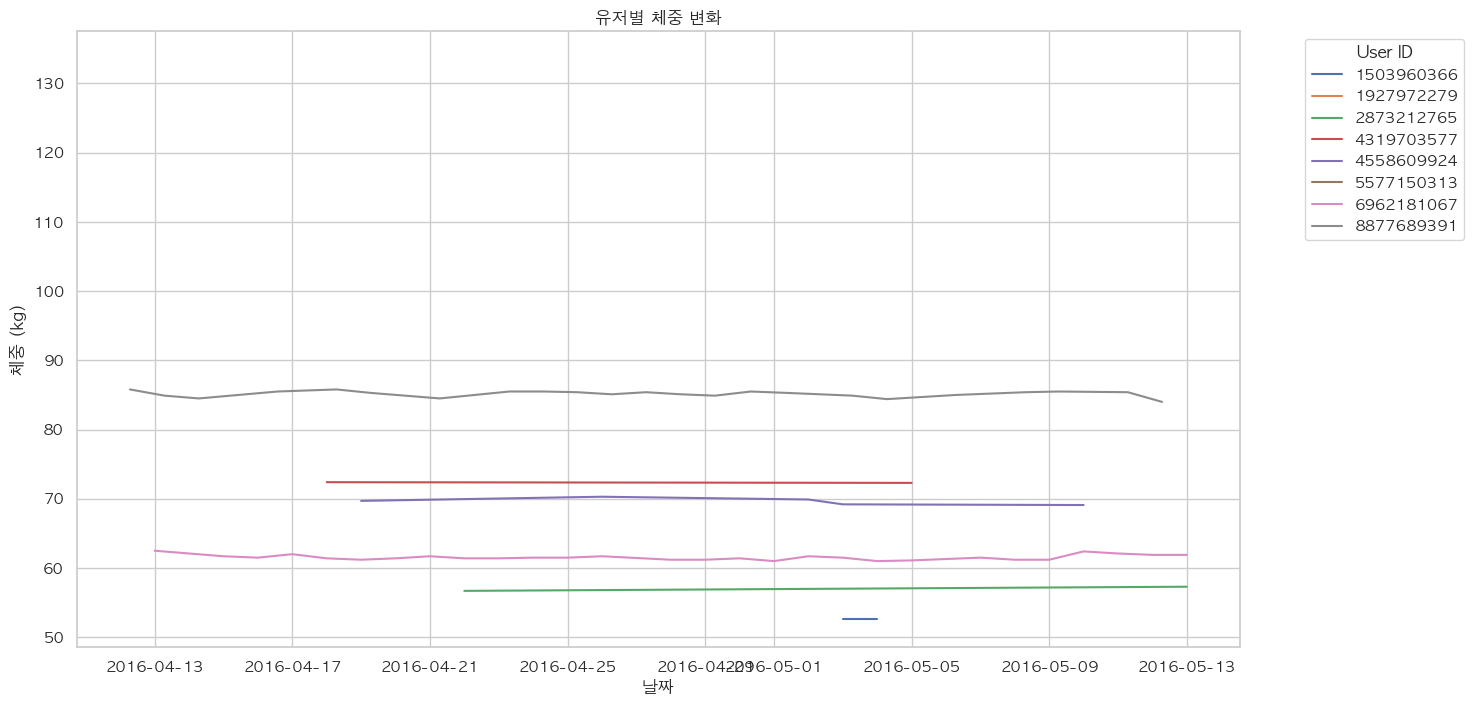

In [112]:
plt.figure(figsize=(15,8))
# 유저별로 시계열 데이터 그리기
for participant in weight['Id'].unique():
    participant_data = weight[weight['Id'] == participant]
    sns.lineplot(x='Date', y='WeightKg', data=participant_data, label=str(participant))

plt.title('유저별 체중 변화')
plt.xlabel('날짜')
plt.ylabel('체중 (kg)')
plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

데이터도 적은데(n=8), 시간에 따른 뚜렷한 체중변화도 확인되지 않아(시계열이 짧은 탓도 있겠다) 유의미한 추론을 하기는 어려워 보인다. 

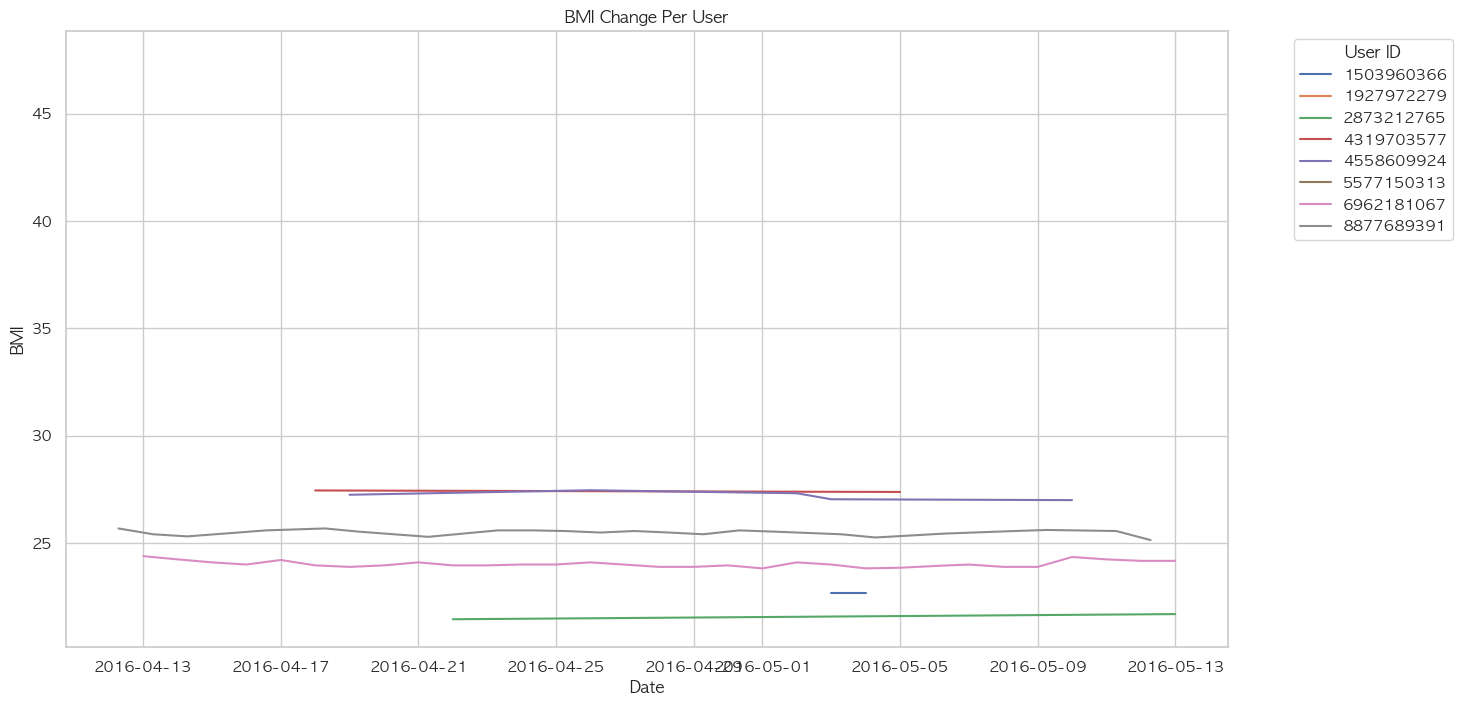

In [113]:
plt.figure(figsize=(15,8))
# 유저별로 시계열 데이터 그리기
for participant in weight['Id'].unique():
    participant_data = weight[weight['Id'] == participant]
    sns.lineplot(x='Date', y='BMI', data=participant_data, label=str(participant))

plt.title('유저별 BMI 변화')
plt.xlabel('Date')
plt.ylabel('BMI')
plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

당연하겠지만 BMI도 변화는 없다.

### 4. 일별 수면 패턴
- 24명의 유저의 수면 데이터.
- 하루 중 수면 횟수, 수면시간, 누워있는 시간이 기록되어 있다.

In [114]:
sleep = dfs['sleepDay_merged']
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [115]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [116]:
sleep['BedToSleepRatio'] = sleep['TotalMinutesAsleep'] / sleep['TotalTimeInBed']

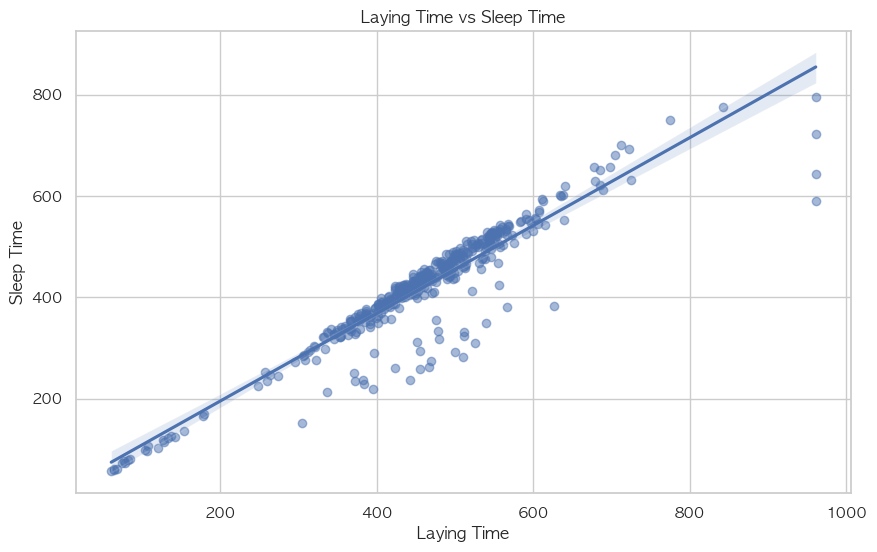

In [117]:
plt.figure(figsize=(10,6))
sns.regplot(x='TotalTimeInBed', y='TotalMinutesAsleep', data=sleep, scatter_kws={'alpha':0.5})
plt.title('Laying Time vs Sleep Time')
plt.xlabel('Laying Time')
plt.ylabel('Sleep Time')
plt.show()


In [118]:
print('수면시간과 누워있는 시간 비율: ', sleep['BedToSleepRatio'].mean())
print('수면시간과 누워있는 시간 비율 최소: ', sleep['BedToSleepRatio'].min())
print('수면시간과 누워있는 시간 비율 최대: ', sleep['BedToSleepRatio'].max())

수면시간과 누워있는 시간 비율:  0.9167692065151059
수면시간과 누워있는 시간 비율 최소:  0.49836065573770494
수면시간과 누워있는 시간 비율 최대:  1.0


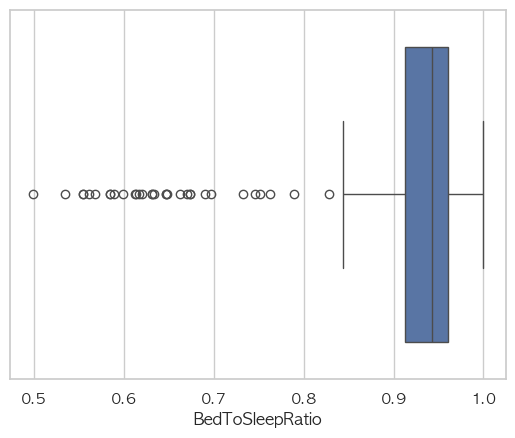

In [119]:
sns.boxplot(x = "BedToSleepRatio",  data = sleep)
plt.show()

In [120]:
bsrQ1 = sleep['BedToSleepRatio'].quantile(.25)
bsrQ3 = sleep['BedToSleepRatio'].quantile(.75)
bsr_IQR = bsrQ3 - bsrQ1

bsr_low_whisker = bsrQ1 - bsr_IQR
print('OUTLIER THRESHOLD: ', bsr_low_whisker)
print('VALUE COUNT BELOW THRESHOLD: ', (sleep['BedToSleepRatio'] < bsr_low_whisker).sum())
print('USERS BELOW THRESHOLD: ', len(sleep[sleep['BedToSleepRatio'] < bsr_low_whisker]['Id'].unique()))

OUTLIER THRESHOLD:  0.8636746455443339
VALUE COUNT BELOW THRESHOLD:  37
USERS BELOW THRESHOLD:  8


산점도를 보면 누워있는 시간과 수면시간 사이의 뚜렷한 선형 관계가 보인다. 다만 그 아래 박스플롯에 보이듯이 누워있는 시간 대비 수면 시간이 낮은 사람들이 몇 보인다.

이들은(=8명/24명; 33.3%) 수면시간/누워있는시간 비율이 86% 이하인 경우를 의미한다. 8시간을 누워있다고 할 때 실제 수면시간은 대략 7시간 미만인 셈. 

**다른 유저들에 비해 수면시간이 부족하다면, 이들에게 수면 유도 알람을 보내 수면 패턴을 개선하는 아이디어도 고려해볼 수 있을 것 같다.**

## 액션플랜

활동 유형에 따라 유저별로 특화된 프로그램을 제안할 수 있다.

| 활동 유형별 집단  | 전략              |
|----------------|------------------|
| 고활동 (Very Active) | 고활동 시간 유지를 위한 활동 유지 챌린지 |
| 중간활동 (Fairly Active)   | 활동량 증가를 위한 목표 설정 및 루틴 제안, 모니터링 알림 서비스 |
| 저활동 (Lightly Active)             | 초기 운동습관 형성을 위한 건강 정보 및 가이드 제공  |
| 무활동 (Sedentary)             |운동부족으로 인한 체중 증가 위험 및 수면 시간 단축 데이터 제공 및 일상 속 간단한 활동 증가 유도 알림 서비스|


또한, bed-to-sleep-ratio가 낮은 집단(<= 0.7)을 위한 수면습관 설문지 및 수면의 질 개선 서비스도 고려해볼 수 있겠다.
- 수면 건강 정보 제공 (불면증 위험, 스트레스/불안 관리)
- 수면 시간 설정 알림 서비스
- 수면 전 명상 프로그램
- 수면 일기쓰기